#### Jérémy TREMBLAY

# TP3 : K-means

In [8]:
# Import the libraries that will be used in this notebook.
import numpy as np

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Other usefull libraries (sklearn, ...)
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Task 1: Create data

**Consigne :** Nous allons tout d’abord générer des données à l’aide du module `sklearn.datasets`. Ces données nous servirons de base pour une bonne compréhension de la validation de modèle dans un cadre non-supervisé. Créer un ensemble de données à partir de la fonction `make_blobs` du module `sklearn.datasets` tel que :  
* le nombre de `samples` soit de 1000.
* le nombre de `centers` fixé à 3.
* le nombre de `features` fixé à 10.
* On peut également ajouté un `random_state` fixe, par exemple 42

In [9]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=10, random_state=42)
print(X, y)

[[-10.86666274   8.50276908   5.31228432 ...   0.62908701  -1.45621127
   -4.50845482]
 [ -9.33574127  10.78272909   7.09305114 ...   0.39721339   0.91133509
   -3.28638007]
 [ -3.93100829  10.51561978   4.317199   ...   9.48852526   1.378782
    5.08929168]
 ...
 [  2.15396857  -6.56124086  -4.74150801 ...   1.64398637   1.70115187
   -9.72761582]
 [  2.86473831  -5.54548096  -3.89335144 ...  -1.23520403   2.77454887
   -9.45699432]
 [  1.26423     -7.2476863   -3.58734811 ...  -0.09493573   2.70544977
   -7.54635315]] [1 1 0 0 1 2 1 0 2 1 0 1 0 1 2 1 0 0 2 0 2 0 2 1 0 1 2 0 1 0 2 2 1 2 0 0 1
 1 0 2 1 2 0 2 0 0 2 0 0 0 0 0 2 0 2 1 2 0 0 1 1 0 1 2 2 2 1 0 2 2 1 1 0 0
 2 1 1 1 2 0 1 0 1 2 1 2 1 1 2 1 0 1 0 0 0 0 0 1 0 2 0 2 0 0 2 0 0 2 0 2 0
 1 0 0 2 2 2 2 2 2 1 0 1 2 1 2 2 1 0 1 0 0 0 1 2 2 2 1 1 1 0 1 1 1 1 2 1 2
 2 2 1 1 1 2 1 1 2 2 0 0 1 0 1 2 1 2 0 0 1 1 1 1 2 2 1 0 1 0 0 1 0 0 1 0 0
 1 1 2 2 2 1 1 2 0 1 2 2 2 1 0 2 1 0 1 0 0 2 0 0 0 1 2 0 0 0 2 2 2 0 2 2 2
 2 0 1 1 1 2 1 0 2 0 1 1

## Task 2: Create a PCA decomposition model

**Consigne :** En l’état, étant donné que nous avons 10 features, il n’est pas possible de projeter nos données et de
les visualiser.  

Pour permettre un visuel de nos données, nous allons utiliser une méthode de réduction de dimensions. Ces méthodes sont disponibles dans le module `sklearn.decomposition`. Dans le cadre de ce TP, nous nous concentrons sur l’analyse en composantes principales (*PCA*). Cette méthode permet de conserver le maximum de variance dans un nombre réduit de nouveaux descripteurs (nommées composantes principales) dont le nombre est définit par l’utilisateur.  

Créer un modèle de décomposition *PCA* tel que :  
* Le nombre de composantes souhaitées en sortie soit de 2.
* Il faudra alors apprendre ce modèle à transformer nos données.
* Attention : ce modèle ne prend que des données en entrée (voir documentation de la méthode `fit`).

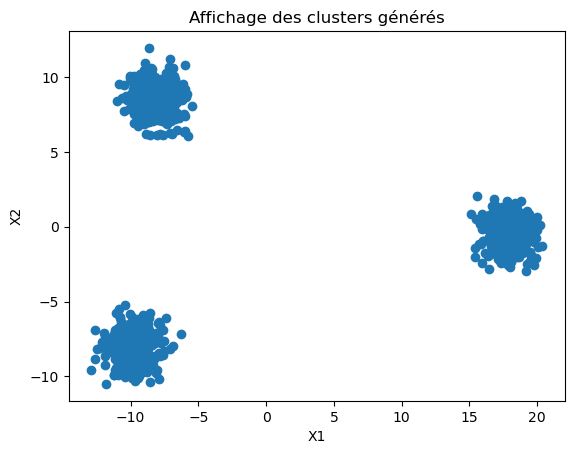

In [10]:
# Create the model and fit it with transformed data.
pca = decomposition.PCA(n_components=2)
X_reshaped = pca.fit_transform(X)

# Display data.
plt.scatter(X_reshaped[:, 0], X_reshaped[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Affichage des clusters générés')
plt.show()

## Task 3: Train the model

**Consigne :** Apprendre un modèle `sklearn.cluster.KMeans` avec un nombre de clusters fixé à 5 :  
* Apprendre le modèle sur les données réduites par la méthode `PCA`.
* Il faudra accéder aux attributs du modèle ayant apprit pour associer des couleurs de classes à chaque point et afficher les centroïdes obtenus.

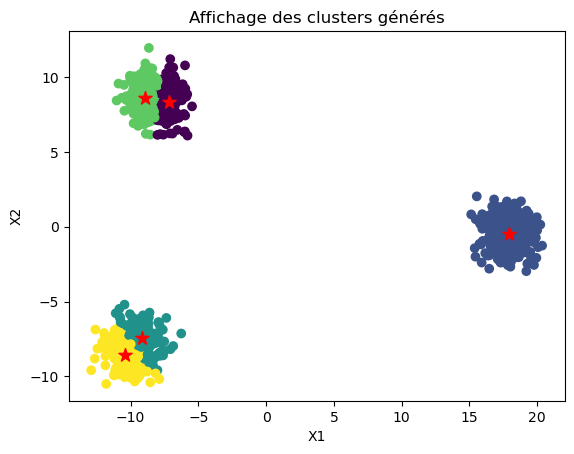

In [11]:
# Train the K-means model.
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X_reshaped)
y_pred = kmeans.predict(X_reshaped)

# Getting the centroids.
centroids = kmeans.cluster_centers_

# Display data.
plt.scatter(X_reshaped[:, 0], X_reshaped[:, 1], c=y_pred)
plt.scatter(centroids[:, 0] , centroids[:, 1], color="red", marker="*", s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Affichage des clusters générés')
plt.show()

## Task 4: Compute errors

**Consigne :** L’exemple précédent montre bien que le choix de *k* = 5 n’est pas forcément le plus judicieux dans notre cas. Toutefois, il est important de le valider et l’expliquer par les performances du modèle. Un critère de validation d’un modèle serait possible en calculant le carré des distances de chaque point par rapport au centroïde qui lui est associé. La formule est la suivante :  

T = 1 / *m* Somme *c*, *i*=0(Somme *m* *i*=1(*δi^j*(*xi* - *µj*)²))

avec :  
* *C* le nombre de classes.
* *m* le nombre de points.
* *µj* le centroïde du cluster *j*.
* *δi^j* = 1 si *i* = *j* et 0 sinon.  

Écrire la fonction `euclidian_distance_from_centroid` qui calcule cette erreur, afin de :  
* Calculer les différentes erreurs pour *k* € [1, 10].
* Afficher les erreurs obtenues à l’aide de `matplotlib`. Il est nécessaire de mettre à jour les *ticks* en coordonnée x pour partir d’une valeur *k* = 1.

Let's define the function:

In [12]:
def euclidian_distance_from_centroid(X, k):
    """
    Calculate the sum of squared distances of data points from thir respective cluster centroids for different values of k.

    Parameters:
    X (array-like): Input data.
    k (int): The maximum number of cluster to consider.

    Returns:
    list: A list of errors, where each error represents the sum of squared distances for a specific number of clusters.

    The function compute the sum of squared distances for different values of k by performing K-Means clustering
    with k clusters for each value of k. It computes the squared Euclidean distance between data points and their
    assigned cluster centroids. The errors are then stored in a list for further analysis.
    """
    errors = []  # Used to stock the errors for different values for k.

    # Iterate through k values.
    for i in range(1, k + 1):
        # Create and train a model base on the k value, then get the centroids and label and compute the error.
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(X)
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        error = 0
        # Compute the sum of squared distances for a specific number k number of cluster.
        for j in range(i):
            cluster_points = X[labels == j]
            error += np.sum((cluster_points - centroids[j]) ** 2)
        errors.append(error)
    return errors

Let's now use it to display a graph with values for k between 1 and 10:

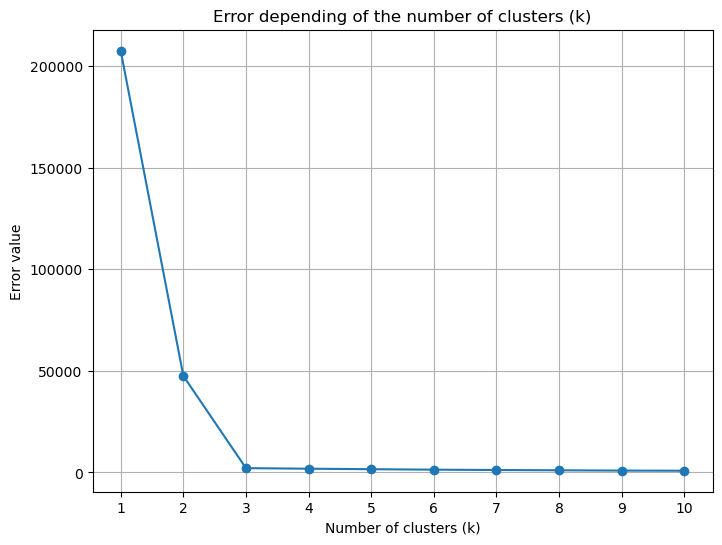

In [13]:
# Compute errors for k between 1 to 10.
kmax = 10
errors = euclidian_distance_from_centroid(X_reshaped, kmax)

# Display errors.
plt.figure(figsize=(8, 6))
plt.plot(range(0, kmax), errors, marker='o')
plt.title('Error depending of the number of clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Error value')
plt.xticks(np.arange(kmax), np.arange(kmax) + 1)
plt.grid(True)
plt.show()

On remarque effectivement que *k* = 3 est bien un nombre de clusters attendu.

## Task 5: Compute silhouette score

**Consigne :** À partir du module `sklearn.metrics`, utiliser la fonction `silhouette_score` pour :  
* Calculer le score silhouette pour k € [2, 10] (cette mesure se base sur au moins 2 clusters).
* Afficher les scores obtenues à l’aide de `matplotlib`.  

À partir de la courbe obtenue, on peut remarquer qu’il ne semble pas judicieux d’augmenter le nombre de clusters au delà de *k* = 6.

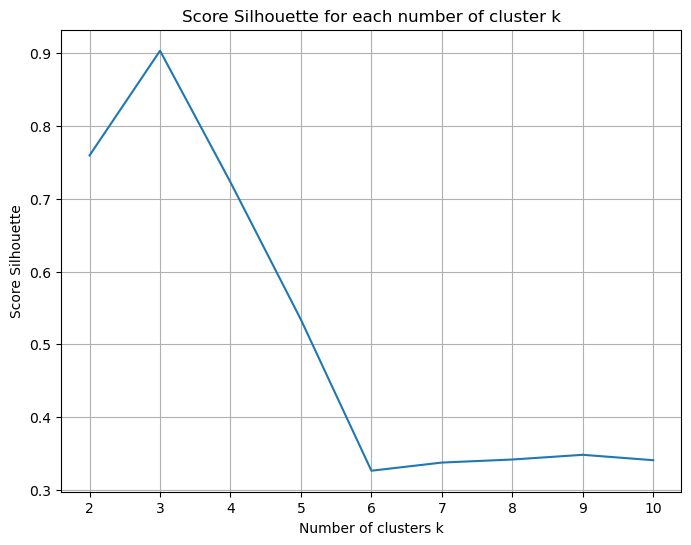

In [14]:
# Use to store data.
silhouette_scores = []

# Compute silouhette score for each k.
for k in range(2,11):
    # Create a model and fit it.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reshaped)
    labels = kmeans.labels_
    # Compute silhouette score.
    score = silhouette_score(X_reshaped, labels)
    silhouette_scores.append(score)

# Display data.
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Score Silhouette for each number of cluster k')
plt.xlabel('Number of clusters k')
plt.ylabel('Score Silhouette')
plt.grid(True)
plt.show()

**Conlusion :** In the analysis, we observe that the silhouette coefficient becomes stable starting from *k* = 6, and the coefficient is highest when *k* = 3. Therefore, it is advisable to choose *k* = 3 clusters to divide the populations in this example. This choice appears consistent when we examine the distribution of these populations on Figure 1 of this notebook (we can observe 3 groups).